In [1]:
import matplotlib.pyplot as plt

In [3]:
import pydot

# Simple test to see if dot is working
graph = pydot.Dot(graph_type='graph')
graph.add_node(pydot.Node("TestNode"))

# Try writing the file
graph.write_png("test_graph.png")
print("Graphviz is working! ✅")


Graphviz is working! ✅


In [4]:
# Set this path to your latest model folder
model_path = "models/model_6"

In [5]:
# Load reward data (negative cumulative reward per episode)
with open(f"{model_path}/plot_reward_data.txt") as f:
    rewards = [float(line.strip()) for line in f.readlines()]

# Load cumulative waiting time
with open(f"{model_path}/plot_delay_data.txt") as f:
    delays = [float(line.strip()) for line in f.readlines()]

# Load average queue length
with open(f"{model_path}/plot_queue_data.txt") as f:
    queue_lengths = [float(line.strip()) for line in f.readlines()]

Text(0, 0.5, 'Reward')

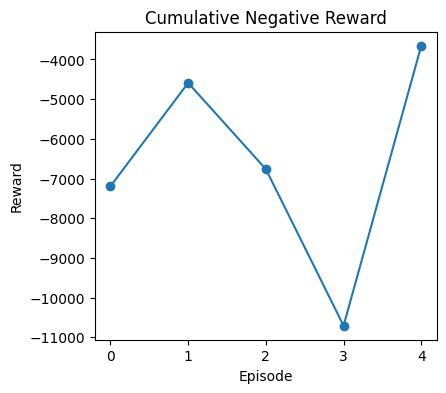

In [7]:
# Plotting
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(rewards, marker='o')
plt.title("Cumulative Negative Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")



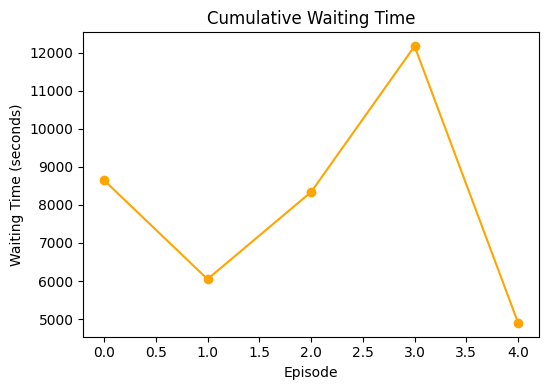

In [13]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(delays, marker='o', color='orange')
plt.title("Cumulative Waiting Time")
plt.xlabel("Episode")
plt.ylabel("Waiting Time (seconds)")
plt.tight_layout()
plt.show()


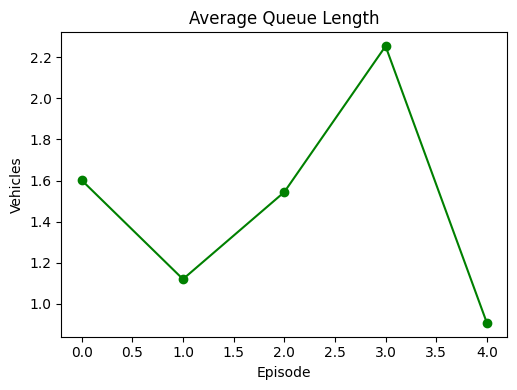

In [12]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 3)
plt.plot(queue_lengths, marker='o', color='green')
plt.title("Average Queue Length")
plt.xlabel("Episode")
plt.ylabel("Vehicles")

plt.tight_layout()
plt.show()

\documentclass{article}
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{geometry}
\geometry{margin=1in}
\usepackage{longtable}

\title{Core Components of a Reinforcement Learning Algorithm}
\date{}

\begin{document}

\maketitle

\begin{longtable}{|p{3cm}|p{12cm}|}
\hline
\textbf{Element} & \textbf{Meaning / Implementation} \\
\hline
\textbf{Agent} &
The agent is a Deep Neural Network model that learns a mapping from states to actions: \[
\pi: \mathcal{S} \rightarrow \mathcal{A}
\]
Implemented in \texttt{TrainModel} using Keras. \\
\hline

\textbf{Environment} &
The SUMO traffic simulator. It simulates traffic at a 4-way intersection with realistic vehicle behavior. The environment provides next states and rewards in response to agent actions. \\
\hline

\textbf{State \( s \)} &
Each state \( s \in \mathcal{S} \) is represented as a binary vector of length 80 indicating cell occupancies: \[
\mathcal{S} = \{0,1\}^{80}, \quad s = [s_1, s_2, \ldots, s_{80}]
\] \\
\hline

\textbf{Action \( a \)} &
The action space consists of 4 discrete traffic light phases: \[
\mathcal{A} = \{0, 1, 2, 3\}
\]
Each corresponds to a specific green light configuration. \\
\hline

\textbf{Reward \( r \)} &
The scalar reward is the reduction in cumulative waiting time: \[
r_t = W_{t-1} - W_t
\]
where \( W_t \) is the total waiting time at time step \( t \). \\
\hline

\textbf{Policy \( \pi \)} &
The agent uses an epsilon-greedy policy to balance exploration and exploitation: \[
\pi(a|s) =
\begin{cases}
\text{random action}, & \text{with probability } \epsilon \\
\arg\max_{a} Q(s, a), & \text{with probability } 1 - \epsilon
\end{cases}
\] \\
\hline

\textbf{Value Function \( Q(s, a) \)} &
Approximated using a neural network and updated using the Bellman equation: \[
Q(s,a) = r + \gamma \max_{a'} Q(s', a')
\]
where \( \gamma \in [0, 1] \) is the discount factor. \\
\hline

\textbf{Replay Memory \( \mathcal{D} \)} &
Stores past experiences to break correlations and improve learning stability: \[
\mathcal{D} = \{(s_t, a_t, r_t, s_{t+1})\}_{t=1}^{N}
\] \\
\hline

\textbf{Learning} &
For each training step, sample a batch \( B \subset \mathcal{D} \) of size \( n \) and train the network by minimizing: \[
\mathcal{L} = \frac{1}{n} \sum_{(s,a,r,s') \in B} \left( Q(s,a) - [r + \gamma \max_{a'} Q(s',a')] \right)^2
\] \\
\hline
\end{longtable}

\end{document}
